## WeatherPy

#### Maria Barrera -- 02/07/2021

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [4]:
# display cities
cities

['ushuaia',
 'halalo',
 'castro',
 'ancud',
 'sao filipe',
 'punta arenas',
 'belushya guba',
 'katsuura',
 'emilio carranza',
 'abu samrah',
 'saint anthony',
 'avarua',
 'norman wells',
 'cap malheureux',
 'port alfred',
 'haines junction',
 'qaanaaq',
 'bluff',
 'airai',
 'iqaluit',
 'leningradskiy',
 'albany',
 'taolanaro',
 'lasa',
 'cape town',
 'capoterra',
 'rikitea',
 'pochutla',
 'sur',
 'san felipe',
 'rudnogorsk',
 'zakharovo',
 'palmer',
 'saskylakh',
 'barpeta',
 'kruisfontein',
 'lebu',
 'hermanus',
 'chernyshevskiy',
 'butaritari',
 'kavaratti',
 'verkhnevilyuysk',
 'jieshi',
 'carnarvon',
 'khatanga',
 'vaini',
 'maniitsoq',
 'manggar',
 'severo-kurilsk',
 'hasaki',
 'new norfolk',
 'salalah',
 'meulaboh',
 'dikson',
 'busselton',
 'uzhhorod',
 'port elizabeth',
 'mar del plata',
 'cabedelo',
 'mataura',
 'presidencia roque saenz pena',
 'yulara',
 'kegayli',
 'panukulan',
 'goderich',
 'tasiilaq',
 'grand river south east',
 'cherskiy',
 'linguere',
 'atuona',
 'taung

In [5]:
# display on 10 cities
# cities[:10]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
### Perform API Calls

####  TEMP for testing only:
city_name= 'yulara'

url=(f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}')
url

'https://api.openweathermap.org/data/2.5/weather?q=yulara&appid=d64f2833aec28689f5af36a76f9fa491'

In [7]:
url=(f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}')
url

'https://api.openweathermap.org/data/2.5/weather?q=yulara&appid=d64f2833aec28689f5af36a76f9fa491'

In [8]:
# Pretty print JSON for weather
response = requests.get(url).json()

print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -25.2406,
        "lon": 130.9889
    },
    "dt": 1612764435,
    "id": 6355222,
    "main": {
        "feels_like": 303.04,
        "humidity": 15,
        "pressure": 1006,
        "temp": 309.15,
        "temp_max": 309.15,
        "temp_min": 309.15
    },
    "name": "Yulara",
    "sys": {
        "country": "AU",
        "id": 9487,
        "sunrise": 1612731439,
        "sunset": 1612778592,
        "type": 1
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 7.2
    }
}


In [9]:
# reference only -- # List for holding lat_lngs and cities
# cities = []

lat_lngs = []

for city in cities:
    url=(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}')
    response = requests.get(url).json()
    
    try:
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]

        lat_lng = {'latitude':lat,
                   'longitude':long}

        print("lat", lat, "long", long)
    except:
        continue

    lat_lngs.append(lat_lng)
    
lat_lngs

lat -54.8 long -68.3
lat -24.7911 long -50.0119
lat -41.8697 long -73.8203
lat 14.8961 long -24.4956
lat -53.15 long -70.9167
lat 35.1333 long 140.3
lat 19.9711 long -96.6114
lat 35.3029 long 37.1841
lat 45.0205 long -93.218
lat -21.2078 long -159.775
lat 65.282 long -126.8329
lat -19.9842 long 57.6142
lat -33.5906 long 26.891
lat 60.7522 long -137.5108
lat 77.484 long -69.3632
lat -46.6 long 168.3333
lat -8.9266 long 125.4092
lat 63.7506 long -68.5145
lat 69.3833 long 178.4167
lat 42.6001 long -73.9662
lat 46.6166 long 10.7002
lat -33.9258 long 18.4232
lat 39.1763 long 8.9718
lat -23.1203 long -134.9692
lat 15.7432 long -96.4661
lat 22.5667 long 59.5289
lat 10.3399 long -68.7425
lat 57.2639 long 103.7519
lat 54.366 long 39.2792
lat 42.1584 long -72.3287
lat 71.9167 long 114.0833
lat 26.3167 long 91
lat -34.0033 long 24.7314
lat -37.6167 long -73.65
lat -34.4187 long 19.2345
lat 63.0128 long 112.4714
lat 3.0707 long 172.7902
lat 10.5669 long 72.642
lat 63.4453 long 120.3167
lat 22.8134

lat 50.4349 long 16.6614
lat 4.095 long 30.6779
lat -17.8 long -63.1667
lat 37.5683 long 126.9778
lat 62.1444 long 117.6319
lat 45.25 long 1.5
lat 35.6003 long 103.2064
lat 55.2999 long -123.1698
lat 31.2089 long 16.5887
lat 64.8569 long -147.8028
lat 22.7583 long 121.1444
lat 39.2489 long 117.7892
lat -32.035 long -52.0986
lat 63.5046 long 53.4095
lat 32.6881 long 128.8419
lat 41.3712 long -73.414
lat -23.4923 long -58.7972
lat -3.3667 long 135.4833
lat 55.4334 long -116.4858
lat 67.45 long 153.6833
lat -23.5333 long 148.1667
lat -12.497 long 131.047
lat 7.4167 long 81.8167
lat 16.8634 long -99.8901
lat -8.7537 long 148.2534
lat -10.4544 long 161.9205
lat -12.0432 long -77.0282
lat 18.9333 long 84.6
lat -33.0153 long 27.9116
lat 15.1718 long 44.3244
lat 14.5333 long 20.9167
lat 11.8091 long 15.8632
lat -20.7333 long 139.5
lat -34.6132 long -58.3772
lat 64.2539 long -15.2082
lat 31.6315 long -8.0083
lat 52.8496 long 17.7199
lat -29.6842 long -53.8069
lat -46.1333 long 167.6833
lat 11.6

[{'latitude': -54.8, 'longitude': -68.3},
 {'latitude': -24.7911, 'longitude': -50.0119},
 {'latitude': -41.8697, 'longitude': -73.8203},
 {'latitude': 14.8961, 'longitude': -24.4956},
 {'latitude': -53.15, 'longitude': -70.9167},
 {'latitude': 35.1333, 'longitude': 140.3},
 {'latitude': 19.9711, 'longitude': -96.6114},
 {'latitude': 35.3029, 'longitude': 37.1841},
 {'latitude': 45.0205, 'longitude': -93.218},
 {'latitude': -21.2078, 'longitude': -159.775},
 {'latitude': 65.282, 'longitude': -126.8329},
 {'latitude': -19.9842, 'longitude': 57.6142},
 {'latitude': -33.5906, 'longitude': 26.891},
 {'latitude': 60.7522, 'longitude': -137.5108},
 {'latitude': 77.484, 'longitude': -69.3632},
 {'latitude': -46.6, 'longitude': 168.3333},
 {'latitude': -8.9266, 'longitude': 125.4092},
 {'latitude': 63.7506, 'longitude': -68.5145},
 {'latitude': 69.3833, 'longitude': 178.4167},
 {'latitude': 42.6001, 'longitude': -73.9662},
 {'latitude': 46.6166, 'longitude': 10.7002},
 {'latitude': -33.9258, '

In [10]:
# Display 10 items for lat / long
lat_lngs[:10]

[{'latitude': -54.8, 'longitude': -68.3},
 {'latitude': -24.7911, 'longitude': -50.0119},
 {'latitude': -41.8697, 'longitude': -73.8203},
 {'latitude': 14.8961, 'longitude': -24.4956},
 {'latitude': -53.15, 'longitude': -70.9167},
 {'latitude': 35.1333, 'longitude': 140.3},
 {'latitude': 19.9711, 'longitude': -96.6114},
 {'latitude': 35.3029, 'longitude': 37.1841},
 {'latitude': 45.0205, 'longitude': -93.218},
 {'latitude': -21.2078, 'longitude': -159.775}]

In [11]:
# display 10 cities
cities[:10]

['ushuaia',
 'halalo',
 'castro',
 'ancud',
 'sao filipe',
 'punta arenas',
 'belushya guba',
 'katsuura',
 'emilio carranza',
 'abu samrah']

In [12]:
# export the city data to a csv file
import csv

# Specify the file to write to
output_path = "output_data/cities_file.csv"

In [13]:
# full run of cities

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(['City ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 
                        'Max Temp', 'Wind Speed'])
    
    # read cities file, get all the values from the API response and write rows to the cities_file
    
    for city in cities:
        url=(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}')
        response = requests.get(url).json()
        try:
            city_id = response["sys"]["id"]
            cloudiness = response["clouds"]["all"]
            country = response["sys"]["country"]
            date = response["dt"]
            humidity = response["main"]["humidity"]
            lat = response["coord"]["lat"]
            long = response["coord"]["lon"]
            max_temp = response["main"]["temp_max"]
            wind_speed = response["wind"]["speed"]
            
            # Display city data
            print(city_id, city, cloudiness, country, date, humidity, lat, long, max_temp, wind_speed)
            
            # write to excel output file
            csvwriter.writerow([city_id, city, cloudiness, country, date, humidity, lat, long, max_temp, wind_speed])
            
        except:
            continue
            

8512 ancud 0 CL 1612764503 94 -41.8697 -73.8203 287.59 3.09
8487 punta arenas 90 CL 1612764504 44 -53.15 -70.9167 288.15 3.09
8074 katsuura 75 JP 1612764505 40 35.1333 140.3 282.15 2.57
4900 saint anthony 90 US 1612764506 71 45.0205 -93.218 254.15 3.09
7271 avarua 50 CK 1612764507 78 -21.2078 -159.775 301.15 3.6
951 norman wells 20 CA 1612764507 74 65.282 -126.8329 236.15 2.06
2002134 cap malheureux 10 MU 1612764507 67 -19.9842 57.6142 302.59 4.47
2011314 port alfred 97 ZA 1612764508 74 -33.5906 26.891 294.82 1.79
287 haines junction 48 CA 1612764454 76 60.7522 -137.5108 243.15 0.51
797 iqaluit 75 CA 1612764480 69 63.7506 -68.5145 274.15 7.72
19530 albany 19 US 1612764388 50 42.6001 -73.9662 265.37 0.89
6813 lasa 90 IT 1612764511 86 46.6166 10.7002 277.15 3.09
1899 cape town 40 ZA 1612764302 72 -33.9258 18.4232 294.26 5.66
6720 capoterra 40 IT 1612764512 93 39.1763 8.9718 283.15 2.57
2005410 pochutla 0 MX 1612764460 88 15.7432 -96.4661 295.93 1.44
3598 palmer 1 US 1612764461 58 42.1584

9288 non sang 0 TH 1612764605 51 16.8687 102.5664 305.93 2.57
7156 ixtapa 1 MX 1612764474 94 20.7 -105.2 292.59 0.96
2061 mahebourg 40 MU 1612764505 62 -20.4081 57.7 303.15 5.14
2061 souillac 40 MU 1612764607 62 -20.5167 57.5167 303.15 5.14
1631 visnes 0 NO 1612764608 72 59.3556 5.2242 261.15 1.54
2127 saint-joseph 75 RE 1612764583 48 -21.3667 55.6167 304.15 2.57
3961 elko 1 US 1612764610 47 41.0002 -115.5012 273.71 3.19
9483 alice springs 73 AU 1612764611 16 -23.7 133.8833 310.15 8.23
7318 teahupoo 20 PF 1612764612 65 -17.8333 -149.2667 301.15 1.03
986 fort nelson 75 CA 1612764612 76 58.8053 -122.7002 244.15 3.6
2012015 marquette 57 US 1612764614 59 46.5333 -87.6335 254.26 2.68
83 husavik 90 IS 1612764614 74 66.0449 -17.3389 273.15 1.54
7147 agua verde 20 MX 1612764615 87 22.9 -106.05 290.37 1.07
9376 semporna 20 MY 1612764616 66 4.4818 118.6112 305.15 3.09
4980 pacific grove 1 US 1612764390 93 36.6177 -121.9166 283.15 3.09
165 qasigiannguit 0 GL 1612764617 42 68.8193 -51.1922 266.15 

2005965 northam 93 GB 1612764739 73 51.0333 -4.2167 274.82 7.6
8027 anan 40 JP 1612764740 35 33.9167 134.65 285.15 7.72
9124 hambantota 20 LK 1612764741 70 6.1241 81.1185 304.15 7.72
7440 behbahan 0 IR 1612764742 94 30.5959 50.2417 285.15 2.06
2002825 peniche 52 PT 1612764744 87 39.3558 -9.3811 285.37 8.05
8922 arkhangelsk 40 RU 1612764745 84 64.5401 40.5433 252.15 4
2012308 huilong 51 CN 1612764746 59 31.8111 121.655 280.93 1.79
4231 galveston 1 US 1612764607 82 29.3669 -94.9669 288.15 5.66
47 qaqortoq 95 GL 1612764748 26 60.7167 -46.0333 277.15 18.01
4624 sterling 1 US 1612764748 46 39.0062 -77.4286 270.15 5.15
974 cranbrook 40 CA 1612764604 72 49.4999 -115.7688 259.15 0.35
2827 avera 1 US 1612764750 87 33.194 -82.5271 274.15 2.64
1450 stornoway 75 GB 1612764751 69 58.2093 -6.3865 274.15 5.66
656 killam 100 CA 1612764755 75 52.7834 -111.8518 238.15 2.57
7411 buraydah 75 SA 1612764756 94 26.326 43.975 285.15 3.09
9486 gold coast 75 AU 1612764757 61 -28 153.4333 301.48 9.26
6900 agucad

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Cities data file
cities_data_path = "output_data/cities_file.csv"
cities_data_path

# read the cities file and put in a pandas dataframe
cities_df = pd.read_csv(cities_data_path)
cities_df.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,8512,ancud,0,CL,1612764503,94,-41.8697,-73.8203,287.59,3.09
1,8487,punta arenas,90,CL,1612764504,44,-53.1500,-70.9167,288.15,3.09
2,8074,katsuura,75,JP,1612764505,40,35.1333,140.3000,282.15,2.57
3,4900,saint anthony,90,US,1612764506,71,45.0205,-93.2180,254.15,3.09
4,7271,avarua,50,CK,1612764507,78,-21.2078,-159.7750,301.15,3.60


In [15]:
#  temperature conversion & column update

new_df = cities_df

# for testing only ---------------
# maxtemp = 294.26
# temp_f = (maxtemp - 273.15) * 9/5 +32
# temp_f
# --------------------------------

for ind in new_df.index: 
    maxtemp = new_df['Max Temp'][ind]
    temp_f = (maxtemp - 273.15) * 9/5 +32
    new_df['Max Temp'][ind] = temp_f
    
    # for testing only
    #print(temp_f)
    #print(new_df['Max Temp'][ind], ind) 
    
new_df.head()

<ipython-input-15-8d8f6c037661>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Max Temp'][ind] = temp_f


,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,8512,ancud,0,CL,1612764503,94,-41.8697,-73.8203,57.992,3.09
1,8487,punta arenas,90,CL,1612764504,44,-53.1500,-70.9167,59.000,3.09
2,8074,katsuura,75,JP,1612764505,40,35.1333,140.3000,48.200,2.57
3,4900,saint anthony,90,US,1612764506,71,45.0205,-93.2180,-2.200,3.09
4,7271,avarua,50,CK,1612764507,78,-21.2078,-159.7750,82.400,3.60


In [16]:
#testing
#new_df[.to_datetime('1612595343', format='%Y%m%d', errors='ignore')
       
#df['Dates'] = pd.to_datetime(df['Dates'], format='%Y%m%d') 
#new_df['Date'] = pd.to_datetime(new_df['Date'], format='%y%m%d', errors='ignore')

#new_df['Date'] = pd.to_datetime(new_df['Date'][0], format='%y%m%d', errors='ignore')
#new_df['Date'] = pd.to_datetime(1612595343, format='%y%m%d', errors='ignore')
#new_df       

#cities_df['Date'][0].Date(levels(data$x), format="%d.%m.%Y")
#cities_df['Date'][0].Date(1612595343, format="%d.%m.%Y")
#x=cities_df['Date'][0]
#x
date='04/01/20'

In [17]:
# create a subset -- for testing only
subset_cities_df = cities_df[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
subset_cities_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,-41.8697,-73.8203,57.992,94,0,3.09,CL,1612764503
1,-53.1500,-70.9167,59.000,44,90,3.09,CL,1612764504
2,35.1333,140.3000,48.200,40,75,2.57,JP,1612764505
3,45.0205,-93.2180,-2.200,71,90,3.09,US,1612764506
4,-21.2078,-159.7750,82.400,78,50,3.60,CK,1612764507


In [18]:
# Describe the dataframe
subset_cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,2.770000e+02
mean,21.294653,-7.205706,47.265625,71.494585,45.992780,4.148087,1.612765e+09
std,34.303917,92.122020,32.584436,18.409123,36.218839,3.165251,1.179967e+02
min,-53.150000,-175.200000,-40.000000,15.000000,0.000000,0.350000,1.612764e+09
25%,-12.043200,-80.011100,26.600000,62.000000,1.000000,2.060000,1.612765e+09
50%,33.083300,-8.780400,53.600000,74.000000,40.000000,3.090000,1.612765e+09
75%,46.533300,57.614200,73.004000,85.000000,75.000000,5.660000,1.612765e+09
max,78.218600,173.783300,98.996000,100.000000,100.000000,18.010000,1.612765e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
cities_humidity_gt_100_df = cities_df[cities_df["Humidity"] >= 100]
cities_humidity_gt_100_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
20,9505,carnarvon,12,AU,1612764520,100,-24.8667,113.6333,84.200,7.72
26,8910,uzhhorod,90,UA,1612764524,100,48.6167,22.3000,35.600,3.22
40,5098,havelock,1,US,1612764534,100,34.8791,-76.9013,33.998,1.86
49,2036058,oster,100,UA,1612764541,100,50.9506,30.8823,10.004,5.84
51,8511,valparaiso,1,CL,1612764501,100,-33.0393,-71.6273,51.800,1.65
69,3218,nantucket,90,US,1612764297,100,41.2835,-70.0995,30.992,9.26
158,2188,port-gentil,40,GA,1612764483,100,-0.7193,8.7815,77.000,1.54
163,5345,greenville,1,US,1612764633,100,35.6127,-77.3663,30.200,1.74
167,7252,cruces,20,CU,1612764636,100,22.3411,-80.2667,69.800,0.51
175,8474,vila velha,90,BR,1612764458,100,-20.3297,-40.2925,69.998,1.54


In [20]:
# Inspect the data and remove the cities where the humidity > 100%

cities_humidity_le_100_df = cities_df

index_names = cities_humidity_le_100_df[ cities_humidity_le_100_df['Humidity'] > 100].index 
  
# drop these row indexes from dataFrame 
cities_humidity_le_100_df.drop(index_names, inplace = True) 
cities_humidity_le_100_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,8512,ancud,0,CL,1612764503,94,-41.8697,-73.8203,57.992,3.09
1,8487,punta arenas,90,CL,1612764504,44,-53.1500,-70.9167,59.000,3.09
2,8074,katsuura,75,JP,1612764505,40,35.1333,140.3000,48.200,2.57
3,4900,saint anthony,90,US,1612764506,71,45.0205,-93.2180,-2.200,3.09
4,7271,avarua,50,CK,1612764507,78,-21.2078,-159.7750,82.400,3.60
...,...,...,...,...,...,...,...,...,...,...
272,1450,stornoway,75,GB,1612764751,69,58.2093,-6.3865,33.800,5.66
273,656,killam,100,CA,1612764755,75,52.7834,-111.8518,-31.000,2.57
274,7411,buraydah,75,SA,1612764756,94,26.3260,43.9750,53.600,3.09
275,9486,gold coast,75,AU,1612764757,61,-28.0000,153.4333,82.994,9.26


In [21]:
# Get the indices of cities that have humidity over 100%.
index_cities_humid_over100 = cities_df[ cities_df['Humidity'] > 100].index 
index_cities_humid_over100

Int64Index([], dtype='int64')

In [22]:
cities_df[ cities_df['Humidity'] > 100]

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [23]:
#### DO NOT RUN -- display for sample reference only
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs Temperature Plot

<function matplotlib.pyplot.close(fig=None)>

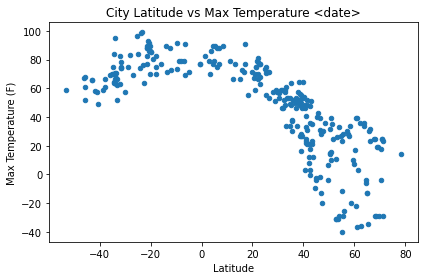

In [24]:
#### scatter plot using pandas --LATITUDE vs TEMPERATURE

cities_df.plot(kind="scatter", x='Lat', y='Max Temp')

plt.title("City Latitude vs Max Temperature <date>")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Temp_plot.png")

#plt.legend()
plt.close

# Latitude vs Humidity Plot

<function matplotlib.pyplot.close(fig=None)>

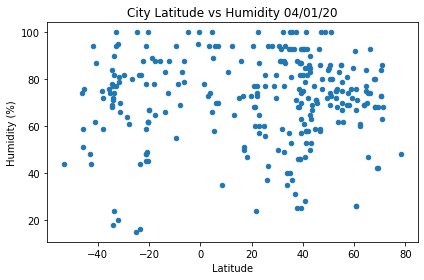

In [25]:
#### scatter plot using pandas --

cities_df.plot(kind="scatter", x='Lat', y='Humidity')

# Set a Title and labels
plt.title("City Latitude vs Humidity " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Humidity_plot.png")

#plt.legend()
plt.close

# Latitude vs Cloudiness Plot

<function matplotlib.pyplot.close(fig=None)>

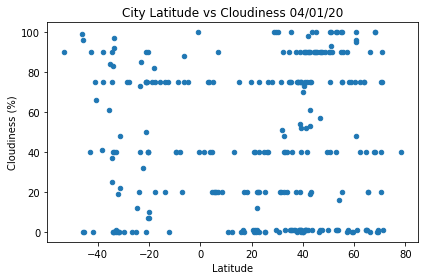

In [26]:
#### scatter plot using pandas -- Latitude vs Cloudiness

cities_df.plot(kind="scatter", x='Lat', y='Cloudiness')

# Set a Title and labels
plt.title("City Latitude vs Cloudiness " + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Cloudiness_plot.png")

#plt.legend()
plt.close

# Latitude vs Wind Speed Plot

<function matplotlib.pyplot.close(fig=None)>

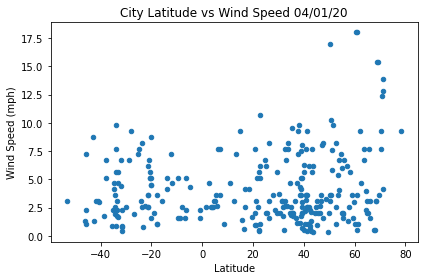

In [27]:
#### scatter plot using pandas --

cities_df.plot(kind="scatter", x='Lat', y='Wind Speed')

# Set a Title and labels
plt.title("City Latitude vs Wind Speed " + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_WindSpeed_plot.png")

#plt.legend()
plt.close

# Northern Hemisphere & Southern Hemisphere

#### Northern Hemipshere:  >= 0 degrees latitude
#### Southern Hemisphere:   < 0 degrees latitude

In [28]:
nor_hem_df=cities_df[ cities_df['Lat'] >= 0]
nor_hem_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,8074,katsuura,75,JP,1612764505,40,35.1333,140.3000,48.2,2.57
3,4900,saint anthony,90,US,1612764506,71,45.0205,-93.2180,-2.2,3.09
5,951,norman wells,20,CA,1612764507,74,65.2820,-126.8329,-34.6,2.06
8,287,haines junction,48,CA,1612764454,76,60.7522,-137.5108,-22.0,0.51
9,797,iqaluit,75,CA,1612764480,69,63.7506,-68.5145,33.8,7.72
...,...,...,...,...,...,...,...,...,...,...
271,2827,avera,1,US,1612764750,87,33.1940,-82.5271,33.8,2.64
272,1450,stornoway,75,GB,1612764751,69,58.2093,-6.3865,33.8,5.66
273,656,killam,100,CA,1612764755,75,52.7834,-111.8518,-31.0,2.57
274,7411,buraydah,75,SA,1612764756,94,26.3260,43.9750,53.6,3.09


In [29]:
sou_hem_df=cities_df[ cities_df['Lat'] < 0]
sou_hem_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,8512,ancud,0,CL,1612764503,94,-41.8697,-73.8203,57.992,3.09
1,8487,punta arenas,90,CL,1612764504,44,-53.1500,-70.9167,59.000,3.09
4,7271,avarua,50,CK,1612764507,78,-21.2078,-159.7750,82.400,3.60
6,2002134,cap malheureux,10,MU,1612764507,67,-19.9842,57.6142,84.992,4.47
7,2011314,port alfred,97,ZA,1612764508,74,-33.5906,26.8910,71.006,1.79
...,...,...,...,...,...,...,...,...,...,...
229,2038233,morrope,88,PE,1612764703,88,-6.5417,-80.0111,69.008,2.24
235,8713,sauce,75,UY,1612764709,78,-34.6469,-56.0628,69.998,4.12
251,8446,mongagua,20,BR,1612764728,82,-24.0931,-46.6208,73.994,3.09
255,2012545,arandis,32,NaN,1612764733,88,-22.4167,14.9667,64.004,2.68


In [30]:
# Latitude vs. Temperature Plot -- All Latitudes
lat=cities_df['Lat']
lat

0     -41.8697
1     -53.1500
2      35.1333
3      45.0205
4     -21.2078
        ...   
272    58.2093
273    52.7834
274    26.3260
275   -28.0000
276    41.4318
Name: Lat, Length: 277, dtype: float64

In [31]:
# split for Northern Hemisphere & Southern Hemisphere
n_lat = nor_hem_df['Lat']
n_lat    

2      35.1333
3      45.0205
5      65.2820
8      60.7522
9      63.7506
        ...   
271    33.1940
272    58.2093
273    52.7834
274    26.3260
276    41.4318
Name: Lat, Length: 197, dtype: float64

In [32]:
# get latitude min & max for x axis
min_n_lat = n_lat.min()
min_n_lat

1.55

In [33]:
max_n_lat = n_lat.max()
max_n_lat

78.2186

In [34]:
# split for Northern Hemisphere & Southern Hemisphere
s_lat = sou_hem_df['Lat']
s_lat  

0     -41.8697
1     -53.1500
4     -21.2078
6     -19.9842
7     -33.5906
        ...   
229    -6.5417
235   -34.6469
251   -24.0931
255   -22.4167
275   -28.0000
Name: Lat, Length: 80, dtype: float64

In [35]:
# get latitude min & max for x axis
min_s_lat = s_lat.min()
min_s_lat

-53.15

In [36]:
max_s_lat = s_lat.max()
max_s_lat

-0.7193

In [37]:
n_temp=nor_hem_df['Max Temp']
n_temp

2      48.2
3      -2.2
5     -34.6
8     -22.0
9      33.8
       ... 
271    33.8
272    33.8
273   -31.0
274    53.6
276    51.8
Name: Max Temp, Length: 197, dtype: float64

In [38]:
# get Temperature min & max for y axis -- NORTHERN HEMISPHERE
min_n_temp = n_temp.min()
min_n_temp

-39.99999999999996

In [39]:
max_n_temp = n_temp.max()
max_n_temp

91.00400000000005

In [40]:
# get Temperature min & max for y axis -- SOUTHERN HEMISPHERE
s_temp=sou_hem_df['Max Temp']
s_temp

0      57.992
1      59.000
4      82.400
6      84.992
7      71.006
        ...  
229    69.008
235    69.998
251    73.994
255    64.004
275    82.994
Name: Max Temp, Length: 80, dtype: float64

In [41]:
# get Temperatrue min & max for y axis
min_s_temp = s_temp.min()
min_s_temp

48.992

In [42]:
max_s_temp = s_temp.max()
max_s_temp

98.99600000000005

# Linear Regression

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
# create the scatter plot - line -- Northern Hemisphere
# Dependencies

from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
temps = nor_hem_df['Max Temp']

correlation = st.pearsonr(lats, temps)
correlation

(-0.7925040873833811, 9.4812220293677e-44)

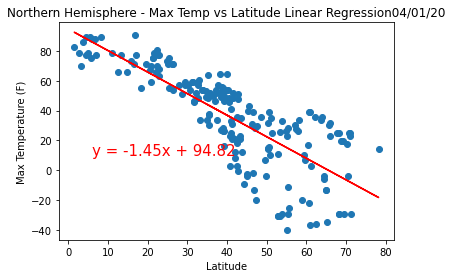

In [44]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression" + date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/N_Lat_vs_Temp_with_line_plot.png")

plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [45]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
temps = sou_hem_df['Max Temp']

correlation = st.pearsonr(lats, temps)
correlation

(0.5510551328993458, 1.1792733783104503e-07)

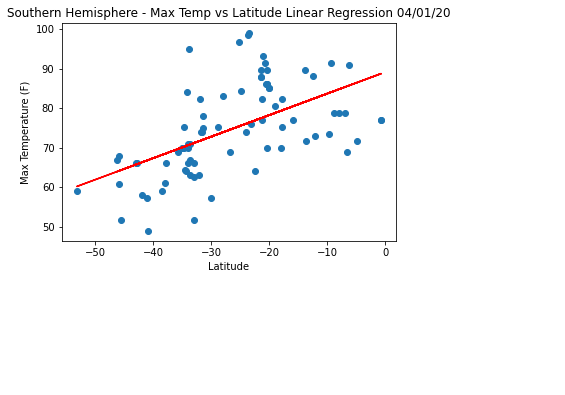

In [46]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/N_Lat_vs_Temp_with_line_plot.png")

plt.show()

#create the scatter plot for Latitude vs. Humidity Plot -- all cities

######scatter plot using pandas -- ALL CITIES

cities_df.plot(kind="scatter", x='Lat', y='Humidity')

######Set a Title and labels
plt.title("City Latitude vs Humidity <date>")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Humidity_plot.png")

#plt.legend()
plt.close

#temp_hum=cities_df['Humidity']
#temp_hum

#get Temperatrue min & max for y axis
#min_humidity = temp_hum.min()
#min_humidity

#max_humidity = temp_hum.max()
#max_humidity

#Create Scatter Pot -- Latitude vs. Humidity Plot

#enable matplotlib so that the correlation / regression line can be drawn over the scatter plot

%matplotlib notebook 

#----------------------------------------------
#Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

from scipy.stats import sem
import scipy.stats as st

#----------------------------------------------

#variables for chart data
x_data = cities_df['Lat']
y_data = cities_df['Humidity']

#----------------------------------------------

#The maximum x value for our chart will be 25
x_limit = max_lat

#List of values 
x_axis = np.arange(min_lat, x_limit, 2)

#Create a random array of data that we will use for our y values
#data = [random.random() for value in x_axis]

#Tells matplotlib to create a scatter plot
#The size of each point on our plot is determined by their x value

plt.scatter(x_data, y_data, marker="o", facecolors="blue", edgecolors="black", s=y_data, alpha=0.75)
            
#x limits of scatter plot
plt.xlim(min_lat-0.5, max_lat+0.9)   

#y limits of scatter plot
plt.ylim(min_humidity-0.1, max_humidity+10)

#Set a Title and labels
plt.title("City Latitude vs Humidity <date>")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# tigh_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Humidity_plot.png")

plt.show()

#plt.close 

#### Nothern Hemisphere Humidity

In [47]:
temp_nor_hum = nor_hem_df['Humidity']
temp_nor_hum

2      40
3      71
5      74
8      76
9      69
       ..
271    87
272    69
273    75
274    94
276    82
Name: Humidity, Length: 197, dtype: int64

In [48]:
# get Temperatrue min & max for y axis
min_nor_humidity = temp_nor_hum.min()
min_nor_humidity

24

In [49]:
max_nor_humidity = temp_nor_hum.max()
max_nor_humidity

100

#### Southern Hemisphere Humidity

In [50]:
temp_sou_hum = sou_hem_df['Humidity']
temp_sou_hum

0      94
1      44
4      78
6      67
7      74
       ..
229    88
235    78
251    82
255    88
275    61
Name: Humidity, Length: 80, dtype: int64

In [51]:
# get Temperatrue min & max for y axis
min_sou_humidity = temp_sou_hum.min()
min_sou_humidity

15

In [52]:
max_sou_humidity = temp_sou_hum.max()
max_sou_humidity

100

####Humidity (%) vs. Latitude Linear Regression

##for ALL CITIES

#create the scatter plot - line
#Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = cities_df['Lat']
hums = cities_df['Humidity']

correlation = st.pearsonr(lats, hums)
correlation

#Add the linear regression equation and line to plot
x_values = cities_df['Lat']
y_values = cities_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Set a Title and labels
plt.title("City Latitude vs Humidity " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Images/Lat_vs_Humidity_with_line_plot.png")

plt.show()

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [53]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
hums = nor_hem_df['Humidity']

correlation = st.pearsonr(lats, hums)
correlation

(-0.05086002857730198, 0.4778460083744527)

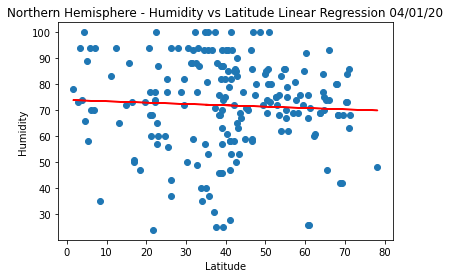

In [54]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Humidity vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Images/N_Lat_vs_Humidity_with_line_plot.png")

plt.show()

In [55]:
print("The r-value: is: ", rvalue)

The r-value: is:  -0.05086002857730198


#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [56]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
hums = sou_hem_df['Humidity']

correlation = st.pearsonr(lats, hums)
correlation

(0.24791491608058988, 0.026605532572481678)

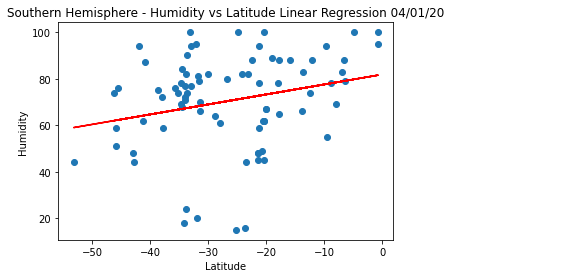

In [57]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
 
plt.savefig("Images/S_Lat_vs_Humidity_with_line_plot.png")

plt.show()

In [58]:
line_eq 

'y = 0.43x + 81.85'

In [59]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.24791491608058983


#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [60]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
clouds = nor_hem_df['Cloudiness']

correlation = st.pearsonr(lats, clouds)
correlation

(0.1605191988620131, 0.02424097155010873)

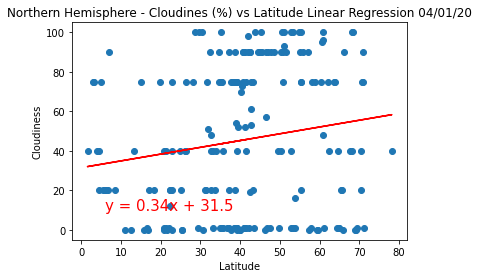

In [61]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Cloudines (%) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Images/N_Cloudat_vs_Humidity_with_line_plot.png")

plt.show()

In [62]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.16051919886201313


#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [63]:
#create the scatter plot - line -- Southern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
clouds = sou_hem_df['Cloudiness']

correlation = st.pearsonr(lats, clouds)
correlation

(0.056737199035969944, 0.617153207127795)

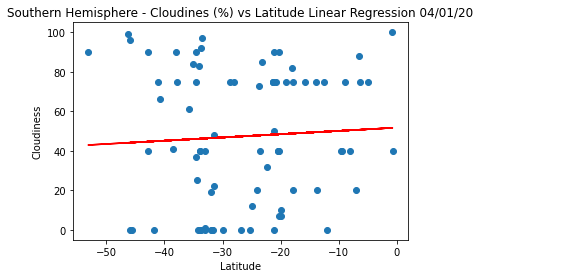

In [64]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Cloudines (%) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Images/N_Cloud_vs_Humidity_with_line_plot.png")

plt.show()

In [65]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.056737199035969944


#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [66]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
winds = nor_hem_df['Wind Speed']

correlation = st.pearsonr(lats, winds)
correlation

(0.2241287507483244, 0.0015446809732342281)

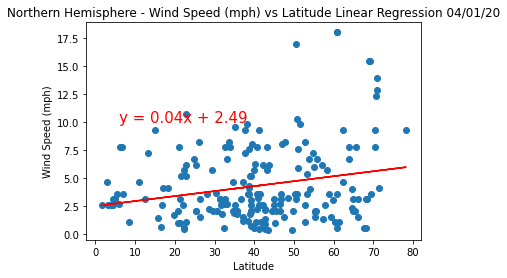

In [67]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/N_WindSpeed_vs_Lat_with_line_plot.png")

plt.show()

In [68]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.22412875074832417


#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [69]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
winds = sou_hem_df['Wind Speed']

correlation = st.pearsonr(lats, winds)
correlation

(-0.013677643454546098, 0.9041530053576847)

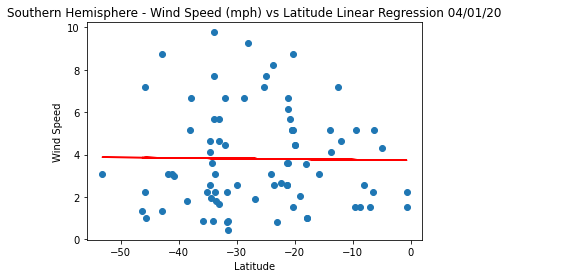

In [70]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("Images/N_WindSpeed_vs_Lat_with_line_plot.png")

plt.show()

In [71]:
print("The r-value: is: ", rvalue)

The r-value: is:  -0.01367764345454608
